# Cancer Prediction Using Machine Learning

## Introduction

This project aims to predict whether a tumor is malignant or benign using machine learning techniques.

The dataset is obtained from GitHub repository and analyzed using Python and Scikit-learn.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset directly from sklearn
cancer_data = load_breast_cancer()

# Convert to DataFrame
data = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Add target column
data['diagnosis'] = cancer_data.target

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


print("Dataset Shape:", data.shape)
print("\nColumn Names:\n", data.columns)
print("\nBasic Statistics:\n")
data.describe()

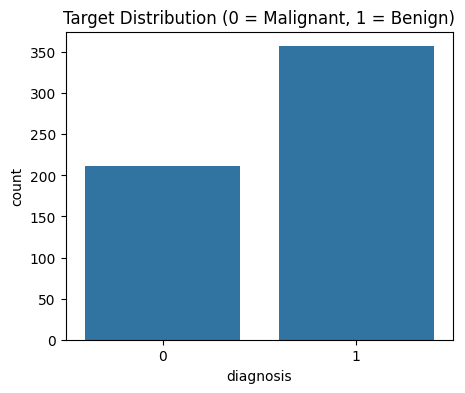

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x='diagnosis', data=data)
plt.title("Target Distribution (0 = Malignant, 1 = Benign)")
plt.show()

In [50]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=101
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)

Training Data: (455, 30)
Testing Data: (114, 30)


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier())
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', GradientBoostingClassifier())])

In [59]:
predictions = model.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9736842105263158


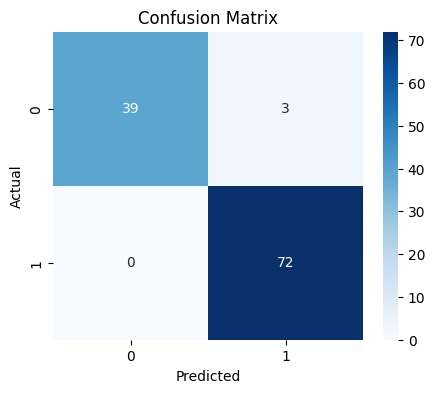

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [61]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, predictions)
print("ROC-AUC Score:", roc_score)

ROC-AUC Score: 0.9642857142857143


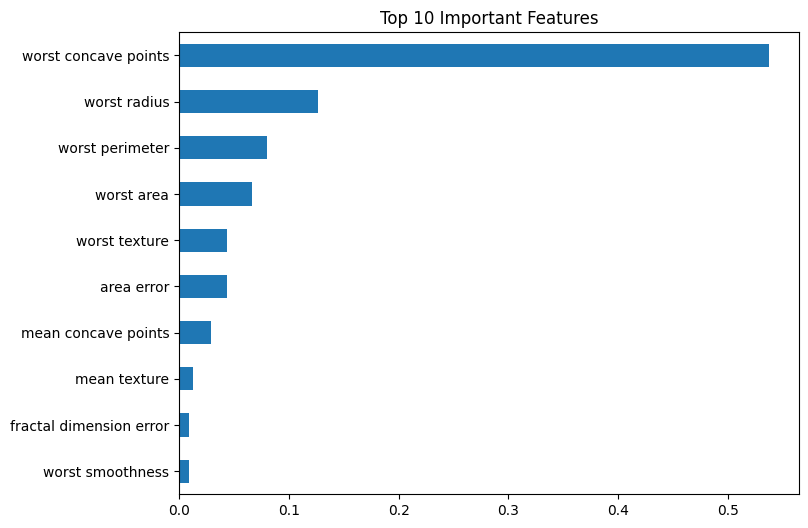

In [62]:
importances = model.named_steps['classifier'].feature_importances_

feature_importance = pd.Series(importances, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()

## Conclusion

The Gradient Boosting model achieved high accuracy in predicting breast cancer diagnosis.

The use of feature scaling and pipeline improved model stability and prevented data leakage.

The model demonstrates how machine learning can assist in early detection of cancer, helping medical professionals make better diagnostic decisions.